In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
all_unemp_path = "Clean Data/all_unemp_clean.csv"
unemp_types_path = "Clean Data/Finalone.csv"

# Read the mouse data and the study results
all_unemp_df = pd.read_csv(all_unemp_path)
unemp_types_df = pd.read_csv(unemp_types_path)

# Combine the data into a single dataset
project1_table_raw = pd.merge(all_unemp_df, unemp_types_df, how="left")

# Display the data table for preview
project1_table_raw

,Month,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,Jan,2001,4.2,3.6,3.6,3.6,8.2,0.0,5.8,6.7,3.8,3.0,1.6
1,Feb,2001,4.2,3.7,3.7,3.7,7.7,0.0,6.1,7.5,3.7,2.8,1.6
2,Mar,2001,4.3,3.8,3.6,3.7,8.3,0.0,6.2,6.8,3.8,2.7,2.0
3,Apr,2001,4.4,3.9,3.7,3.9,8.0,0.0,6.4,6.8,3.7,2.9,2.1
4,May,2001,4.3,3.9,3.8,3.8,7.9,0.0,6.3,6.6,3.9,3.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,May,2021,5.8,5.9,5.4,5.1,9.1,5.5,7.3,9.1,6.8,5.9,3.2
245,Jun,2021,5.9,5.9,5.5,5.2,9.2,5.8,7.4,10.2,7.0,5.8,3.5
246,Jul,2021,5.4,5.4,5.0,4.8,8.2,5.3,6.6,9.5,6.3,5.0,3.1
247,Aug,2021,5.2,5.1,4.8,4.5,8.8,4.6,6.4,7.8,6.0,5.1,2.8


In [2]:
# Remove Month column and find average
project1_table_raw = project1_table_raw.drop(['Month'], axis=1)
project1_table_raw.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.2,3.6,3.6,3.6,8.2,0.0,5.8,6.7,3.8,3.0,1.6
1,2001,4.2,3.7,3.7,3.7,7.7,0.0,6.1,7.5,3.7,2.8,1.6
2,2001,4.3,3.8,3.6,3.7,8.3,0.0,6.2,6.8,3.8,2.7,2.0
3,2001,4.4,3.9,3.7,3.9,8.0,0.0,6.4,6.8,3.7,2.9,2.1
4,2001,4.3,3.9,3.8,3.8,7.9,0.0,6.3,6.6,3.9,3.0,2.1


In [3]:
# Display the data table for preview
project1_table_year = project1_table_raw.groupby(['Year'],as_index=False).mean()
project1_table_year.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.741667,4.216667,4.125000,4.166667,8.650000,0.000000,6.575000,7.241667,4.183333,3.300000,2.258333
1,2002,5.783333,5.300000,5.058333,5.100000,10.241667,0.000000,7.558333,8.433333,5.258333,4.533333,2.908333
2,2003,5.991667,5.650000,5.116667,5.250000,10.783333,5.983333,7.658333,8.791667,5.450000,4.791667,3.075000
3,2004,5.541667,5.041667,4.841667,4.800000,10.375000,4.416667,6.950000,8.508333,4.983333,4.233333,2.716667
4,2005,5.083333,4.416667,4.583333,4.366667,9.983333,3.975000,6.008333,7.625000,4.708333,3.866667,2.308333


In [4]:
# Find Average of each year
pd.options.display.float_format = '{:.2f}'.format
project1_table_year.head()

,Year,All Unemployment,Men (20+),Women (20+),White,Black or African American,Asian,Hispanic or Latino,Less than a High School Diploma (25+),High School Graduates No College (25+),Some College or Associate Degree (25+),Bachelor's Degree and Higher (25+)
0,2001,4.74,4.22,4.12,4.17,8.65,0.00,6.58,7.24,4.18,3.30,2.26
1,2002,5.78,5.30,5.06,5.10,10.24,0.00,7.56,8.43,5.26,4.53,2.91
2,2003,5.99,5.65,5.12,5.25,10.78,5.98,7.66,8.79,5.45,4.79,3.07
3,2004,5.54,5.04,4.84,4.80,10.38,4.42,6.95,8.51,4.98,4.23,2.72
4,2005,5.08,4.42,4.58,4.37,9.98,3.98,6.01,7.62,4.71,3.87,2.31


In [5]:
# project1_table_year.dtypes

In [6]:
project1_table_year['Year'] = pd.to_datetime(project1_table_year['Year'], format='%Y')

In [7]:
project1_table_year.dtypes

Year                                      datetime64[ns]
All Unemployment                                 float64
Men (20+)                                        float64
Women (20+)                                      float64
White                                            float64
Black or African American                        float64
Asian                                            float64
Hispanic or Latino                               float64
Less than a High School Diploma (25+)            float64
High School Graduates No College (25+)           float64
Some College or Associate Degree (25+)           float64
Bachelor's Degree and Higher (25+)               float64
dtype: object

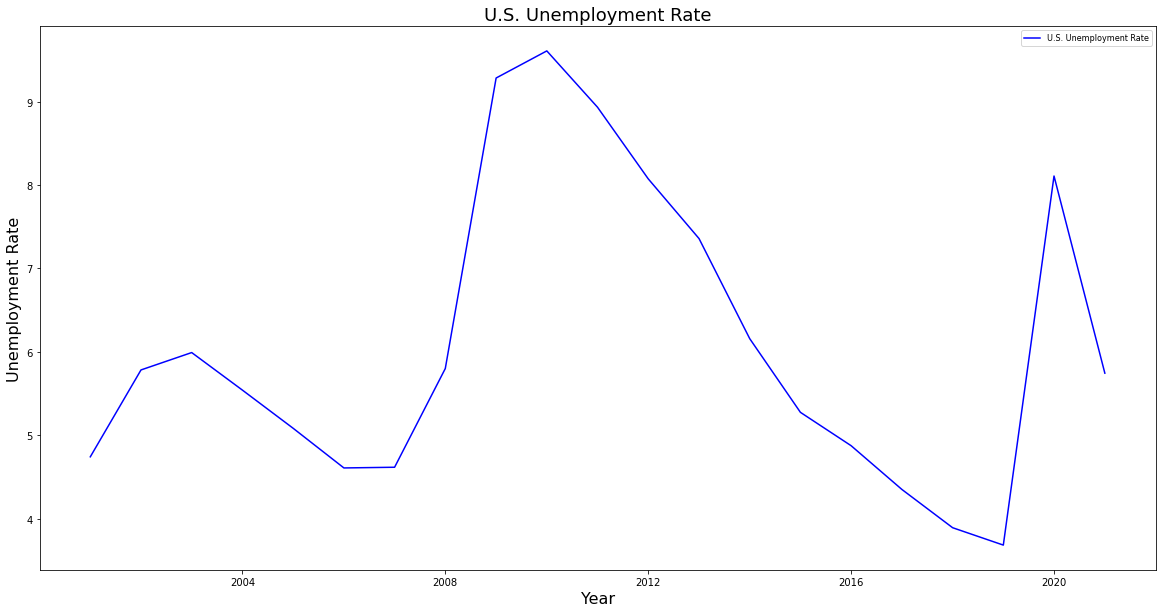

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a line plot of All Unemployment vs. years
# line_plot_df = project1_table_year.loc[project1_table_year["All Unemployment"]]
# project1_table_year['Year'] = pd.to_datetime(project1_table_year['Year'], format='%Y')
# Collect the annual unemployment rates
plt.figure(figsize=(20,10))
x = project1_table_year['Year']
y = project1_table_year['All Unemployment']
line, = plt.plot(x, y, color="blue", label="U.S. Unemployment Rate")
plt.title('U.S. Unemployment Rate',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)
plt.legend(handles=[line],loc="best",fontsize=8)

plt.show()
plt.savefig("Images/US Unemployment Rate")



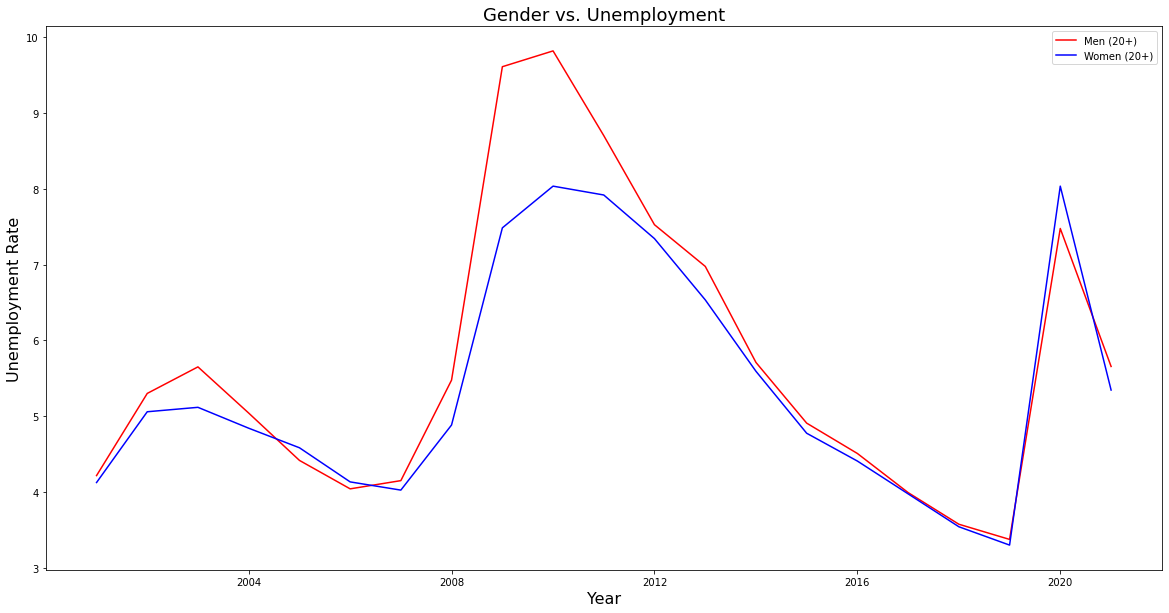

In [9]:
plt.figure(figsize=(20,10))
plt.plot( 'Year','Men (20+)', data=project1_table_year, color='red')
plt.plot( 'Year','Women (20+)', data=project1_table_year, color='blue')
plt.legend()
plt.title("Gender vs. Unemployment",fontsize=18)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Unemployment Rate",fontsize=16)
plt.savefig("Images/Gender vs Unemployment Rate")

/Users/azmirsuljic/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'White' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  


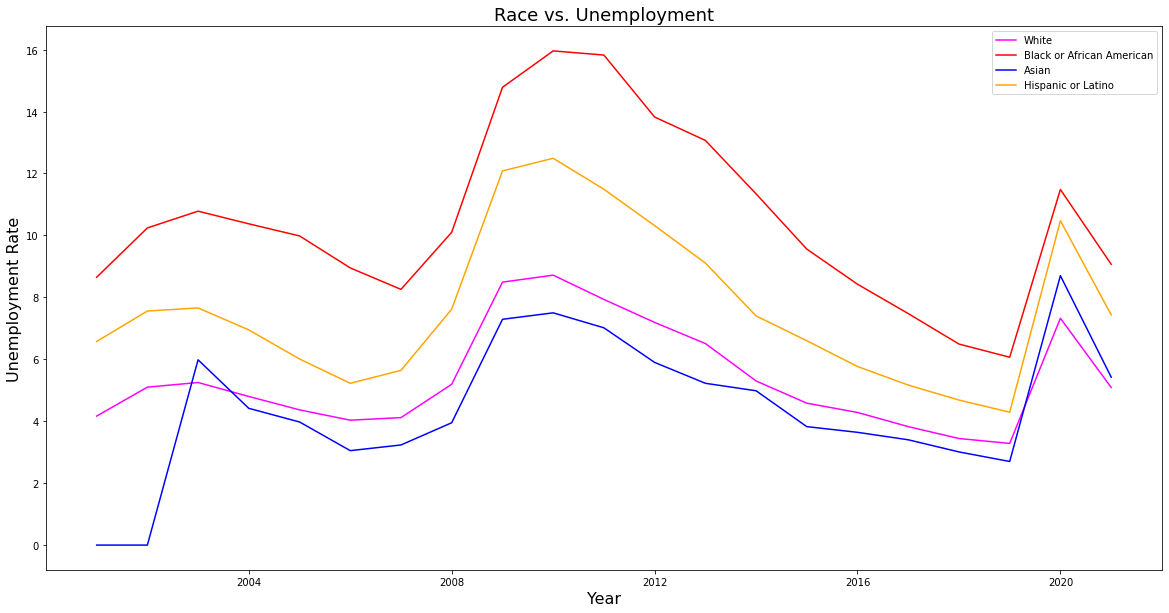

In [10]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'White', data=project1_table_year, color='magenta')
plt.plot( 'Year', 'Black or African American', data=project1_table_year, color='red')
plt.plot( 'Year', 'Asian', data=project1_table_year, color='blue')
plt.plot( 'Year', 'Hispanic or Latino', data=project1_table_year, color='orange')
plt.legend()
plt.title("Race vs. Unemployment",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)
plt.savefig("Images/Race vs Unemployment Rate")

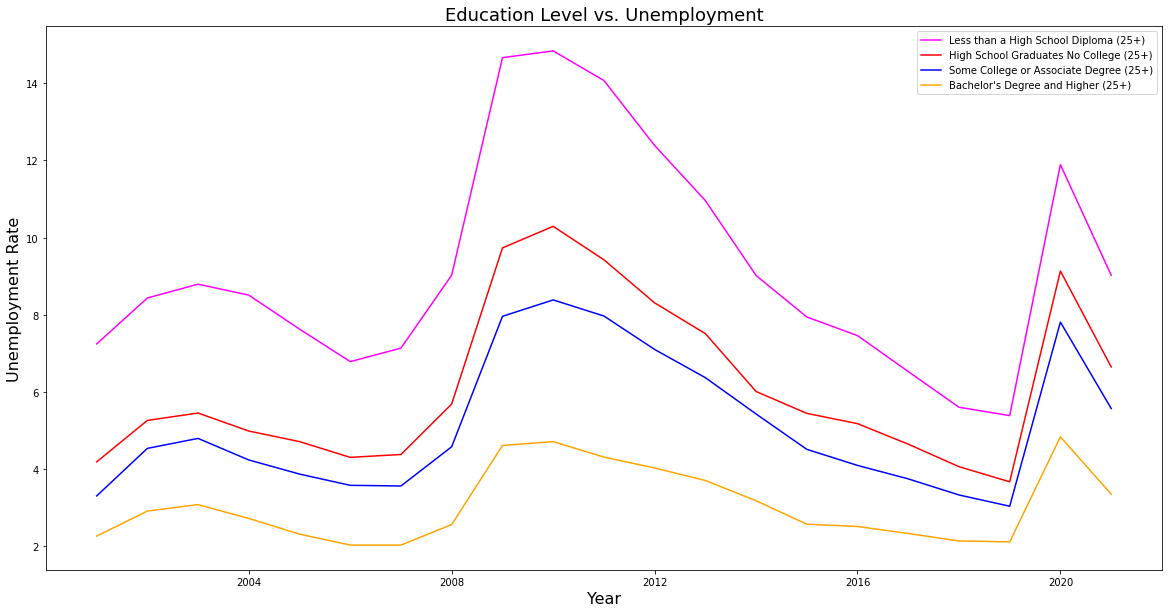

In [11]:
plt.figure(figsize=(20,10))
plt.plot( 'Year', 'Less than a High School Diploma (25+)', data=project1_table_year, color='magenta')
plt.plot( 'Year', 'High School Graduates No College (25+)', data=project1_table_year, color='red')
plt.plot( 'Year', 'Some College or Associate Degree (25+)', data=project1_table_year, color='blue')
plt.plot( 'Year', "Bachelor's Degree and Higher (25+)", data=project1_table_year, color='orange')
plt.legend()
plt.title("Education Level vs. Unemployment",fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Unemployment Rate',fontsize=16)
plt.savefig("Images/Education vs Unemployment Rate")